In [1]:
!pip install -r requirements.txt

  Obtaining dependency information for pandas==2.3.2 from https://files.pythonhosted.org/packages/28/30/8114832daff7489f179971dbc1d854109b7f4365a546e3ea75b6516cea95/pandas-2.3.2-cp312-cp312-win_amd64.whl.metadata
  Using cached pandas-2.3.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for scikit-learn==1.7.1 from https://files.pythonhosted.org/packages/15/fa/c61a787e35f05f17fc10523f567677ec4eeee5f95aa4798dbbbcd9625617/scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata
  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for jupyter==1.1.1 from https://files.pythonhosted.org/packages/38/64/285f20a31679bf547b75602702f7800e74dbabae36ef324f716c02804753/jupyter-1.1.1-py2.py3-none-any.whl.metadata
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Obtaining dependency information for jupyter-console from https://files.pythonhosted.org/packages/ca/77/71d78d58f15c22db16328a476426f7


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from scipy import stats
from scipy.stats import probplot

In [10]:
df = pd.read_csv("teen_phone_addiction_dataset.csv")
data = df['Sleep_Hours']

In [11]:
data.isna().sum()
len(data)

3000

In [12]:
mean = data.mean()
var = data.var()
mode = data.mode()[0] if not data.mode().empty else np.nan
median = data.median()
quantilies = data.quantile([0.25, 0.5, 0.75])
kurtosis = stats.kurtosis(data, bias = False)
skew = stats.skew(data, bias=False)
iqr = quantilies[0.75] - quantilies[0.25]

In [13]:
print("Среднее значение", mean)
print("Дисперсия", var)
print("Мода", mode)
print("Медиана", median)
print("Квантили", quantilies.values)
print("Эксцесс",kurtosis)
print("Ассиметрия", skew)
print("Интерквартильный размах", iqr)

Среднее значение 6.489766666666668
Дисперсия 2.2222260208958544
Мода 6.1
Медиана 6.5
Квантили [5.5 6.5 7.5]
Эксцесс -0.2954414857948535
Ассиметрия 0.011854250604519176
Интерквартильный размах 2.0


Среднее, мода и медиана примерно равно. Коэф ассиметрии близок к нулю, следовательно распределение почти симметрично. 
Эксцесс лежит в диапозоне от -0.5 до 3 =>
распределение близко к нормальному, но более плоское. Половина данных лежит в дипозоне от 5.5 до 7.5


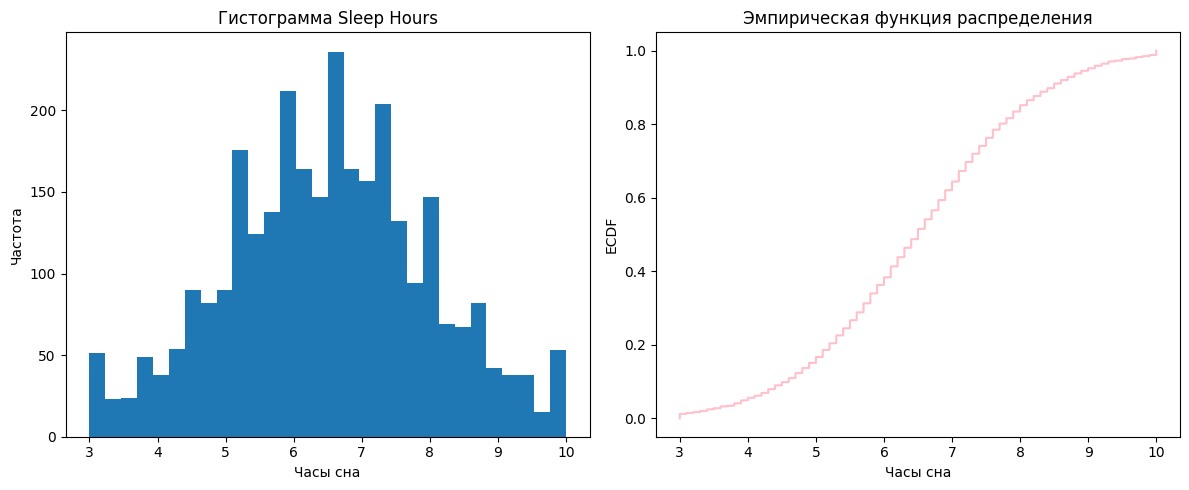

In [33]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data, bins= 30)
plt.title('Гистограмма Sleep Hours')
plt.xlabel('Часы сна')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sorted_data = sorted(data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, y, color='pink')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Часы сна')
plt.ylabel('ECDF')

plt.tight_layout()
plt.show()

In [17]:
std = np.sqrt(var)
n = len(data)

#Разбиваем данные на интервалы
bins = 10
hist, bin_edges = np.histogram(data, bins = bins, density=False)
observed = hist #наблдаемые частоты

# Вычисляем ожидаемые частоты
expected = []
for i in range(len(bin_edges) - 1):
    left = bin_edges[i]
    right = bin_edges[i + 1]
    prob = stats.norm.cdf(right, mean, std) - stats.norm.cdf(left, mean, std)
    expected.append(prob * n)

expected = np.array(expected)

if any(e < 5 for e in expected):
    print("Предупреждение: некоторые ожидаемые частоты < 5, попробуйте увеличить bins или объединить интервалы")

#Статистика хи квадрат
chi_square_stat = np.sum((observed - expected)**2 / expected)
df_chi = len(observed) - 1 - 2
critical_value = stats.chi2.ppf(1 - 0.05, df_chi)

print("Критерий хи-квадрат:")
print(f"Статистика хи-квадрат: {chi_square_stat:.2f}")
print(f"Критическое значение (alpha=0.05, df={df_chi}): {critical_value:.2f}")
if chi_square_stat > critical_value:
    print("Отвергаем гипотезу о нормальности (данные не нормальны)")
else:
    print("Не отвергаем гипотезу о нормальности")


Критерий хи-квадрат:
Статистика хи-квадрат: 57.26
Критическое значение (alpha=0.05, df=7): 14.07
Отвергаем гипотезу о нормальности (данные не нормальны)


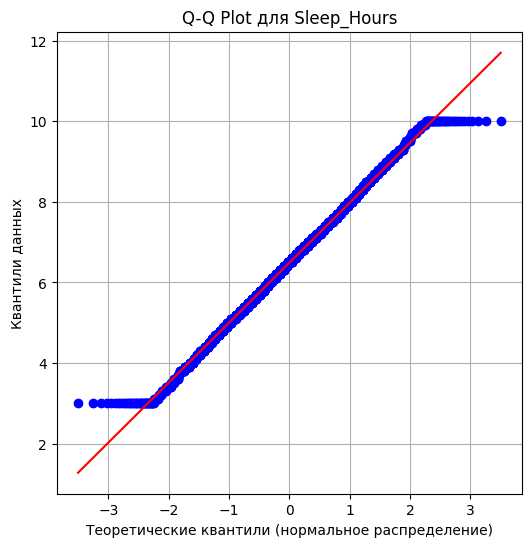

In [18]:
plt.figure(figsize=(6, 6))
probplot(data, dist='norm', plot=plt)
plt.title('Q-Q Plot для Sleep_Hours')
plt.xlabel('Теоретические квантили (нормальное распределение)')
plt.ylabel('Квантили данных')
plt.grid(True)
plt.show()

Приведение данных к нормальному распределению через удаление выбросов

In [21]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
lower_bound = max(0, q1 - 1.5 * iqr)
upper_bound = q3 + 1.5 * iqr
print(f"Количество выбросов: {((data < lower_bound) | (data > upper_bound)).sum()} из {len(data)}")
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]



Количество выбросов: 0 из 3000


логорифмирование и возведение в квадрат, тоже не помогло

In [23]:

has_negative = np.any(data < 0)
print("Есть отрицательные значения:", has_negative)

has_zero = np.any(data == 0)
print("Есть нулевые значения:", has_zero)

Есть отрицательные значения: False
Есть нулевые значения: False


Преобразование Бокса-Кокса — это метод, который применяется к положительным данным для стабилизации дисперсии и приведения распределения к нормальному виду. Находится лямбда.  Значение lambda подбирается так, чтобы после преобразования данные имели распределение, максимально близкое к нормальному.

$ \lambda = 1 $: Данные уже близки к нормальным, требуется только сдвиг (линейное преобразование).
$ \lambda = 0 $: Логарифмическая трансформация ($ \ln(x) $).
$ \lambda = 0.5 $: Преобразование квадратного корня ($ \sqrt{x} $).
$ \lambda = -1 $: Обратное преобразование ($ 1/x $).

In [26]:
from scipy.stats import boxcox

In [27]:
transformed_data, lambda_opt = boxcox(data)

In [28]:
print(lambda_opt)

0.9413810162850482


In [29]:
std = np.sqrt(transformed_data.var())
mean_value = transformed_data.mean()
n = len(transformed_data)

#Разбиваем данные на интервалы
bins = 10
hist, bin_edges = np.histogram(transformed_data, bins = bins, density=False)
observed = hist #наблдаемые частоты

# Вычисляем ожидаемые частоты
expected = []
for i in range(len(bin_edges) - 1):
    left = bin_edges[i]
    right = bin_edges[i + 1]
    prob = stats.norm.cdf(right, mean_value, std) - stats.norm.cdf(left, mean_value, std)
    expected.append(prob * n)

expected = np.array(expected)

if any(e < 5 for e in expected):
    print("Предупреждение: некоторые ожидаемые частоты < 5, попробуйте увеличить bins или объединить интервалы")

#Статистика хи квадрат
chi_square_stat = np.sum((observed - expected)**2 / expected)
df_chi = len(observed) - 1 - 2
critical_value = stats.chi2.ppf(1 - 0.05, df_chi)

print("Критерий хи-квадрат:")
print(f"Статистика хи-квадрат: {chi_square_stat:.2f}")
print(f"Критическое значение (alpha=0.05, df={df_chi}): {critical_value:.2f}")
if chi_square_stat > critical_value:
    print("Отвергаем гипотезу о нормальности (данные не нормальны)")
else:
    print("Не отвергаем гипотезу о нормальности")


Критерий хи-квадрат:
Статистика хи-квадрат: 54.78
Критическое значение (alpha=0.05, df=7): 14.07
Отвергаем гипотезу о нормальности (данные не нормальны)


Сгруппируйте данные по столбцу 'School_Grade'.

На одном графике постройте гистограммы для каждой группы.
Рассчитайте среднее, дисперсию внутри каждой группы

In [30]:
grouped = df.groupby('School_Grade')['Sleep_Hours']
stats = grouped.agg(['mean', 'var']).round(2)
print('Среднее и диспресия по группам')
print(stats)

Среднее и диспресия по группам
              mean   var
School_Grade            
10th          6.49  2.10
11th          6.37  2.11
12th          6.46  2.20
7th           6.48  2.29
8th           6.68  2.41
9th           6.47  2.20


Среднее и дисперсия по группам равны

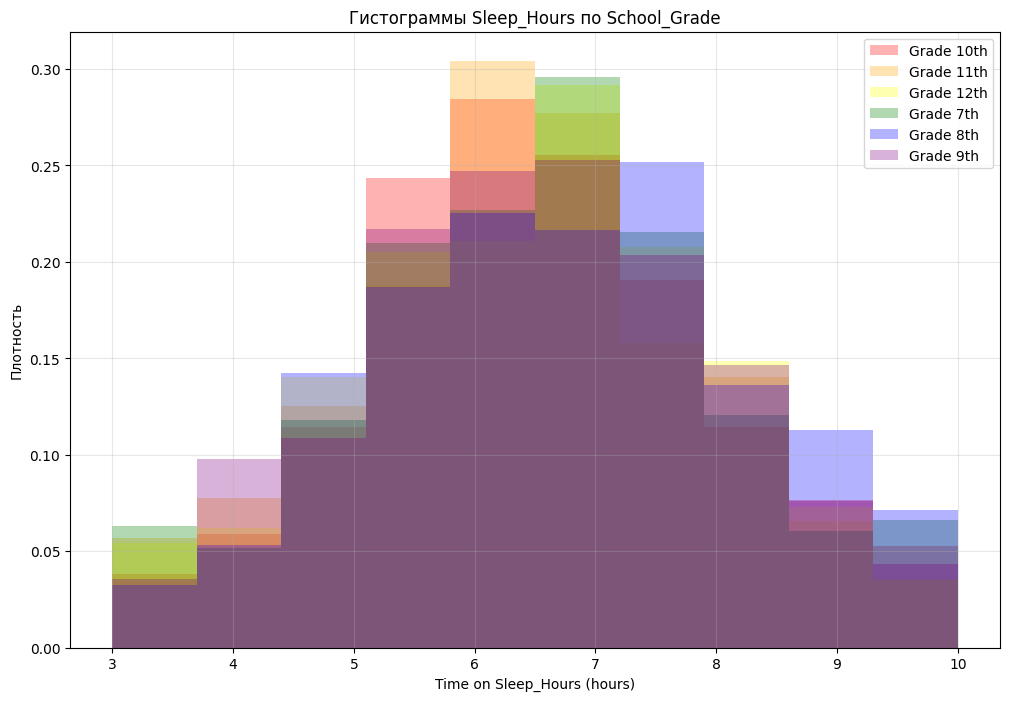

In [31]:
plt.figure(figsize=(12, 8))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for (grade, group), color in zip(grouped, colors[:len(grouped)]):
    group.hist(bins=10, alpha=0.3, label=f'Grade {grade}', color=color, density=True)

plt.title('Гистограммы Sleep_Hours по School_Grade')
plt.xlabel('Time on Sleep_Hours (hours)')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()    

В 12 классе больше всего детей спят по 6 часов из всех групп. В 8 классе больше всего детей спят по 8-10 часов относительно других групп.